<a href="https://colab.research.google.com/github/XgitAccountX/Machine-Learning-Pt.-2-Spearing-Rachel/blob/main/FinalProjPartTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Food_Display_Table.xlsx to Food_Display_Table (14).xlsx
'Food_Display_Table (10).xlsx'	'Food_Display_Table (4).xlsx'
'Food_Display_Table (11).xlsx'	'Food_Display_Table (5).xlsx'
'Food_Display_Table (12).xlsx'	'Food_Display_Table (6).xlsx'
'Food_Display_Table (13).xlsx'	'Food_Display_Table (7).xlsx'
'Food_Display_Table (14).xlsx'	'Food_Display_Table (8).xlsx'
'Food_Display_Table (1).xlsx'	'Food_Display_Table (9).xlsx'
'Food_Display_Table (2).xlsx'	 Food_Display_Table.xlsx
'Food_Display_Table (3).xlsx'	 sample_data
Food_Code               0
Display_Name            0
Portion_Default         0
Portion_Amount          0
Portion_Display_Name    0
Factor                  3
Increment               0
Multiplier              0
Grains                  0
Whole_Grains            0
Vegetables              0
Orange_Vegetables       0
Drkgreen_Vegetables     0
Starchy_vegetables      0
Other_Vegetables        0
Fruits                  0
Milk                    0
Meats                   0
Soy   

ValueError: ignored

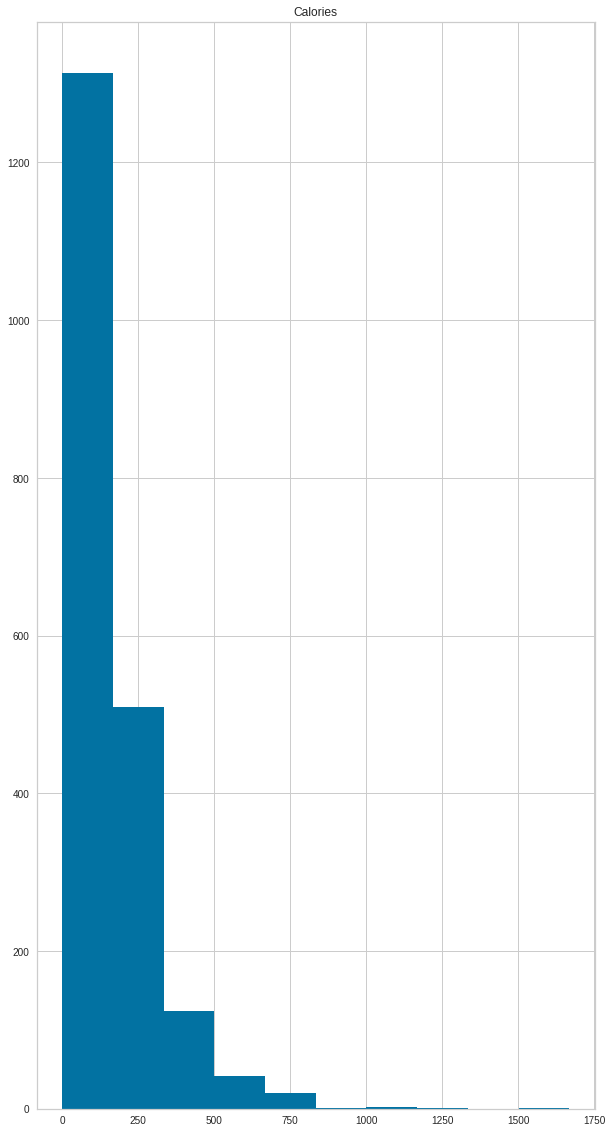

In [18]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import preprocessing
from google.colab import files
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
#swap for logistic regression
from sklearn.linear_model import SGDRegressor


from yellowbrick.regressor import ResidualsPlot

from  sklearn.preprocessing import StandardScaler

files.upload()


!ls

'''
Data Set Link: https://catalog.data.gov/dataset/mypyramid-food-raw-data#sec-dates
Publisher: Food and Nutrition Service, Department of Agriculture
Maintainer Angela Leone
Metadata: created Date November 10,2020
Metadat updated data November 13, 2020

My Pyramid Food Raw Data

Food and Nutrition Service USDA (United States Department of Agriculture)
'''

pd.set_option('display.max_rows', 10000)

 
df2 = pd.read_excel('./Food_Display_Table.xlsx')
df = df2.copy()


print( df.isnull().sum() )

#The only missing data is from a column that will not be relevant for further analysis,
# so I am leaving it in and will drop the entire column later.

#Part one plot distribution of target values. Summary of other relevant pertinent staticsitcs/ distrubtitoins
print("describe: ")
print(df.describe())
print("dtypes: ")
print(df.dtypes)

his = df.hist( column='Calories', figsize=(10,20))


#Three. Dropping non-numeric columns.
#food_Code should be dropped because its unique identifier doesn't carry any 
#value/weight in model training
#portion_Display_Name should be dropped because we have portion_amount 
#which tells us the actual numeric amout, and we don't need a label for that.
#keepingDisplay_Name because we may want to label what food the calories 
#generated belong to


#Create  at least 3 aggregation columns. mena, std deviate, min/max, 
#easily with transforms or pd.agg
df['test'] = df[['Vegetables', 'Orange_Vegetables', 'Drkgreen_Vegetables','Starchy_vegetables', 'Other_Vegetables', 'Calories', ]].groupby('Calories')[ 'Vegetables'].transform("sum")


foodColumns =  ['Grains', 'Whole_Grains', 'Vegetables', 'Orange_Vegetables', 'Drkgreen_Vegetables','Starchy_vegetables', 'Other_Vegetables', 'Fruits', 'Milk', 'Meats',
                      'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats' , 'Added_Sugars', 'Alcohol', 'Saturated_Fats' ]

#Calculats the average calories
df['Mean of Food Calories'] = df[foodColumns].mean(axis=1)

#calculates the sum of vegetable grouped by portion amount
df['Sum of Vegetables'] = df.groupby('Portion_Amount')['Vegetables'].transform("sum")

#calcualtes the sun of saturated fats grouped by portion amout
df['Sum of Saturated Fats'] = df.groupby('Portion_Amount')['Saturated_Fats'].transform("sum")


#label encoding chosen because while there is a size difference between a 
#chocolate bar and a cereal box, it is difficult to order an equally weighted
#can of ravioli versus a soda can. 
le = preprocessing.LabelEncoder()
df2['Display_Name'] = le.fit_transform(df2['Display_Name'])



#7.  Split data into features (X_data) and labels (y_data)
#features to predit species by.
#get string out of it. by label encoding 29:58

#31:38
#target, what we're trying to predict
y_data = df['Calories']

#everything else besides target, aparantly.
x_data = df.drop(columns=['Multiplier','Increment','Factor','Food_Code','Display_Name','Portion_Display_Name', 'Portion_Default'])




#8 scale/normalize your data
#make x and y x is features and y is our labels.
#trying to predict calories for a portion.

'''
x_train = train[['Grains','Whole_Grains','Vegetables', 'Orange_Vegetables', 'Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables', 'Fruits', 'Milk', 'Meats',
                       'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats' , 'Added_Sugars', 'Alcohol', 'Saturated_Fats']]
y_train= train['Calories']

x_test = test[['Grains', 'Whole_Grains', 'Vegetables', 'Orange_Vegetables', 'Drkgreen_Vegetables','Starchy_vegetables', 'Other_Vegetables', 'Fruits', 'Milk', 'Meats',
                       'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats' , 'Added_Sugars', 'Alcohol', 'Saturated_Fats' ]]
y_test = test['Calories']
'''

#scales data.
scaleData = StandardScaler()
x_data = scaleData.fit_transform(x_data)

x_test, x_train, y_train, y_test = train_test_split(x_data, y_data, test_size=0.01)



#results: error.
#0.1:
#0.2:
#0.3:
#0.4:
#0.5:
#0.6:
#0.7:
#0:8


#import a model
#initlize linear regressinon model oject
reg = SGDRegressor()


#train on x labels, our input features.
#getting an inconsistetn number of values error. drop two rows.
# Error: Found input variables with inconsistent numbers of samples: [605, 1409]
#cut to 0: to 100, 0 to  200, etc.
reg = reg.fit(x_train[0:100], y_train[0:100])
print("Reg's Score (shows accuracy):")
print( reg.score(x_test[0:100], y_test[0:100]) )

#temp = df.loc[ df['Portion_Amount'] >= 1][['Grains','Whole_Grains','Vegetables', 'Orange_Vegetables', 'Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables', 'Fruits', 'Milk', 'Meats',
#                       'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats' , 'Added_Sugars', 'Alcohol','Saturated_Fats']]

temp = df.loc[ df['Portion_Amount'] >= 0][['Grains','Whole_Grains','Vegetables', 'Orange_Vegetables', 'Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables', 'Fruits', 'Milk', 'Meats',
                       'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats' , 'Added_Sugars', 'Alcohol','Saturated_Fats']]
predictionCalories = reg.predict(temp)


linearReg = LinearRegression()
linearReg = linearReg.fit(x_train[0:100],y_train[0:100])
print("Reg's Score:")
print( linearReg.score(x_test, y_test) )

temp2 = df.loc[ df['Portion_Amount'] >= 1][['Grains','Whole_Grains','Vegetables', 'Orange_Vegetables', 'Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables', 'Fruits', 'Milk', 'Meats',
                       'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats' , 'Added_Sugars', 'Alcohol','Saturated_Fats']]

predictionCalories2 = linearReg.predict(x_train)

# Part 3 Post model Analysis
#Part 4. residual analysis
visual = ResidualsPlot(linearReg)
visual.fit(x_test, y_test)
print("Score:")
visual.score(x_train, y_train)
visual.poof()



#Analysis: Looks like an extremely linear plot, perhaps too accurate of a prediction, but based on data, it looks fine.

#part five do research for plotting logistic model
#I used geeks for geeks advice on using stat_smooth to play the original data and then draw the line.
# I also liked the idea of sta_summary bin for bins points was not entirely sure what that all represnted
#so didn't use it
#https://www.geeksforgeeks.org/how-to-plot-a-logistic-regression-curve-in-r/


#there were several ways to do this, one was the confusion matrix, another was using libarayes of usign stat_smooth to draw roginal data and draw the line through it with ggplot1
#I thought about using the confusion matrix, which will store the correct value and our predictions, and then we can use a distplot
#to plot them. the code was used from a tutorial/medium article "logistiv Regression" by Aditya Kumar
#https://adityakumar529.medium.com/logistic-regression-using-python-8752d03027be 

logisticGraph = sns.distplot(y_data, hist=False, color="b", label="True Values")
sns.distplot(predictionCalories, hist=False, color="g",label="Predicted Values", ax=logisticGraph)
plt.show()
plt.close()


#part 6. make argument.
# I believe that logistic regression would've worked better if i had managed to get the error out of my code,
#I think it woudl handle the multiple different types of vairables
#to predict calories better than linear regression, which has a very simplistic
#approach to prediction.


df



